
# Project: Communicate Data Findings (2017-fordgobike-tripdata)  

## by Sidhi Agarwal

### Introduction

This project has two parts that demonstrate the importance and value of data visualization techniques in the data analysis process.

This is the first part, here I will use Python visualization libraries to systematically explore a 2017-fordgobike-tripdata, starting from plots of single variables and building up to plots of multiple variables.

In the second part, I will produce a short presentation that illustrates interesting properties, trends, and relationships that you discovered in your selected dataset.(Provided in another file)

### Table of Contents

 - Introduction
 - Data Gathering
 - Data Assessing
 - Data Cleaning
 - Data Exploration and Analysis
 - Conclusion

### Data Gathering

  - Ford GoBike is a regional public bike sharing system in San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. The dataset used for this exploratory analysis consists of Bay Wheels's trip data for public use for March 2020, which you can find here.

- This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area from  November, 2017 to December, 2017. <a href="https://www.lyft.com/bikes/bay-wheels">Click</a>


In [42]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Data Gathering

In [43]:
# load dataset in dataframe
df = pd.read_csv('2017-fordgobike-tripdata.csv')

## Data Assessing

In [44]:
df.head()

duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   

   start_station_id                                 start_station_name  \
0                74                              Laguna St at Hayes St   
1               284  Yerba Buena Center for the Arts (Howard St at ...   
2               245                             Downtown Berkeley BART   
3                60                               8th St at Ringold St   
4               239                      Bancroft Way at Telegraph Ave   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.776435              -122.426244              43   
1               37.784872              -122.400876              96   
2               37.870348              -122.267764             245   
3               37.774520              -122.409449               5   
4               37.868813              -122.258764             247   

                                    end_station_name  end_station_latitude  \
0  San Francisco Public Library (Grove St at Hyde...             37.778768   
1                              Dolores St at 15th St             37.766210   
2                             Downtown Berkeley BART             37.870348   
3       Powell St BART Station (Market St at 5th St)             37.783899   
4                          Fulton St at Bancroft Way             37.867789   

   end_station_longitude  bike_id   user_type  
0            -122.415929     96.0    Customer  
1            -122.426614     88.0    Customer  
2            -122.267764   1094.0    Customer  
3            -122.408445   2831.0    Customer  
4            -122.265896   3167.0  Subscriber

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155686 entries, 0 to 155685
Data columns (total 13 columns):
duration_sec               155686 non-null int64
start_time                 155686 non-null object
end_time                   155686 non-null object
start_station_id           155686 non-null int64
start_station_name         155686 non-null object
start_station_latitude     155686 non-null float64
start_station_longitude    155686 non-null float64
end_station_id             155686 non-null int64
end_station_name           155686 non-null object
end_station_latitude       155685 non-null float64
end_station_longitude      155685 non-null float64
bike_id                    155685 non-null float64
user_type                  155685 non-null object
dtypes: float64(5), int64(3), object(5)
memory usage: 15.4+ MB


In [46]:
df.shape

(155686, 13)

In [47]:
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  155686.000000     155686.000000           155686.000000   
mean      950.053479        102.259696               37.766216   
std      2998.245882         87.441625                0.098268   
min        61.000000          3.000000               37.317298   
25%       366.000000         28.000000               37.771058   
50%       572.000000         77.000000               37.781270   
75%       886.000000        154.000000               37.795392   
max     86369.000000        340.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            155686.000000   155686.000000         155685.000000   
mean               -122.357491       99.564103             37.766501   
std                   0.117429       86.873426              0.098174   
min                -122.444293        3.000000             37.317298   
25%                -122.412544       26.000000             37.771662   
50%                -122.399018       75.000000             37.781752   
75%                -122.390648      150.000000             37.795392   
max                -121.874119      340.000000             37.880222   

       end_station_longitude        bike_id  
count          155685.000000  155685.000000  
mean             -122.356609    1864.618011  
std                 0.116832    1019.861317  
min              -122.444293      10.000000  
25%              -122.411403    1014.000000  
50%              -122.398773    1967.000000  
75%              -122.390648    2762.000000  
max              -121.874119    3733.000000

In [48]:
df.duplicated().sum()

0

In [49]:
df.user_type.value_counts()

Subscriber    130772
Customer       24913
Name: user_type, dtype: int64

In [50]:
#Checking for missing values using isnull()
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       1
end_station_longitude      1
bike_id                    1
user_type                  1
dtype: int64

### There are some data quality issues such as

- start_time and end_time columns are in string format instead of datetime format
- bike_id are in int format instead of object format
- user_type is in string format. Can be transformed into categorical variable

## What is the structure of your dataset?

   ### Each trip is anonymized and includes:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
###### There are 155686 records and 13 columns

### There are some data quality issues such as

  - start_time and end_time columns are in string format instead of datetime format
  - start_station_id, end_station_id are in float format instead of integer format
  - user_type is in string format. Can be transformed into categorical variable

## What is/are the main feature(s) of interest in your dataset?

   - When are most trips taken in terms of time of day, day of the week, or month of the year?
   - Does the average duration depend on if a user is a subscriber or customer?
   - Does the average duration depend on if a user is a subscriber or customer?
   
    I would like to understand a bit about the patterns in terms of days in the week or in the year when rides are more frequent. Also to check at which time in the day is more common to have rides and also how all this relates with the user type.

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?

   - Trip Duration
   - Start TIme
   - End Time
   - User Type 
   



In [51]:
# make copy of data
df_clean = df.copy()

### Define

   1) convert data formats for start_time, end_time into correct datatype (from object to datetime)

### Code

In [52]:
# convert datatype of start_time and end_time from object to datatime
df_clean['start_time']=pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

### TEST

In [53]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155686 entries, 0 to 155685
Data columns (total 13 columns):
duration_sec               155686 non-null int64
start_time                 155686 non-null datetime64[ns]
end_time                   155686 non-null datetime64[ns]
start_station_id           155686 non-null int64
start_station_name         155686 non-null object
start_station_latitude     155686 non-null float64
start_station_longitude    155686 non-null float64
end_station_id             155686 non-null int64
end_station_name           155686 non-null object
end_station_latitude       155685 non-null float64
end_station_longitude      155685 non-null float64
bike_id                    155685 non-null float64
user_type                  155685 non-null object
dtypes: datetime64[ns](2), float64(5), int64(3), object(3)
memory usage: 15.4+ MB


### Define
  2) convert data formats for start_station_id, end_station_id into correct one
### Code

In [54]:
#  convert datatype of start_station_id and end_station_id to int
df_clean['start_station_id'] = df_clean['start_station_id'].astype('int')
df_clean['end_station_id'] = df_clean['end_station_id'].astype('int')

### TEST

In [55]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155686 entries, 0 to 155685
Data columns (total 13 columns):
duration_sec               155686 non-null int64
start_time                 155686 non-null datetime64[ns]
end_time                   155686 non-null datetime64[ns]
start_station_id           155686 non-null int64
start_station_name         155686 non-null object
start_station_latitude     155686 non-null float64
start_station_longitude    155686 non-null float64
end_station_id             155686 non-null int64
end_station_name           155686 non-null object
end_station_latitude       155685 non-null float64
end_station_longitude      155685 non-null float64
bike_id                    155685 non-null float64
user_type                  155685 non-null object
dtypes: datetime64[ns](2), float64(5), int64(3), object(3)
memory usage: 15.4+ MB


### Define

   3) convert data formats for user_type columns into correct one

### Code

In [56]:
# convert datatype of user_type to category
df_clean['user_type'] = df_clean['user_type'].astype('category')

### TEST

In [57]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155686 entries, 0 to 155685
Data columns (total 13 columns):
duration_sec               155686 non-null int64
start_time                 155686 non-null datetime64[ns]
end_time                   155686 non-null datetime64[ns]
start_station_id           155686 non-null int64
start_station_name         155686 non-null object
start_station_latitude     155686 non-null float64
start_station_longitude    155686 non-null float64
end_station_id             155686 non-null int64
end_station_name           155686 non-null object
end_station_latitude       155685 non-null float64
end_station_longitude      155685 non-null float64
bike_id                    155685 non-null float64
user_type                  155685 non-null category
dtypes: category(1), datetime64[ns](2), float64(5), int64(3), object(2)
memory usage: 14.4+ MB


### Define
3) convert data formats for user_type columns into correct one
### Code

In [58]:
# convert datatype of bike_id to object
df_clean['bike_id'] = df_clean['bike_id'].astype('object')

### TEST

In [59]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155686 entries, 0 to 155685
Data columns (total 13 columns):
duration_sec               155686 non-null int64
start_time                 155686 non-null datetime64[ns]
end_time                   155686 non-null datetime64[ns]
start_station_id           155686 non-null int64
start_station_name         155686 non-null object
start_station_latitude     155686 non-null float64
start_station_longitude    155686 non-null float64
end_station_id             155686 non-null int64
end_station_name           155686 non-null object
end_station_latitude       155685 non-null float64
end_station_longitude      155685 non-null float64
bike_id                    155685 non-null object
user_type                  155685 non-null category
dtypes: category(1), datetime64[ns](2), float64(4), int64(3), object(3)
memory usage: 14.4+ MB


### Define
   5) extract date,day of the week,month,minute,hour from the start_time
### Code

In [60]:
# Extract minute,day,week,month from the start_time
df_clean['duration_min'] = df_clean['duration_sec']/60

df_clean['start_date'] = df_clean.start_time.dt.strftime('%Y-%m-%d')
df_clean['start_hour_of_day'] = df_clean.start_time.dt.strftime('%H')
df_clean['start_day_of_week'] = df_clean.start_time.dt.strftime('%A')
df_clean['start_month'] = df_clean.start_time.dt.strftime('%B')

### TEST

In [61]:
df_clean.head()

duration_sec              start_time                end_time  \
0         80110 2017-12-31 16:57:39.654 2018-01-01 15:12:50.245   
1         78800 2017-12-31 15:56:34.842 2018-01-01 13:49:55.617   
2         45768 2017-12-31 22:45:48.411 2018-01-01 11:28:36.883   
3         62172 2017-12-31 17:31:10.636 2018-01-01 10:47:23.531   
4         43603 2017-12-31 14:23:14.001 2018-01-01 02:29:57.571   

   start_station_id                                 start_station_name  \
0                74                              Laguna St at Hayes St   
1               284  Yerba Buena Center for the Arts (Howard St at ...   
2               245                             Downtown Berkeley BART   
3                60                               8th St at Ringold St   
4               239                      Bancroft Way at Telegraph Ave   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.776435              -122.426244              43   
1               37.784872              -122.400876              96   
2               37.870348              -122.267764             245   
3               37.774520              -122.409449               5   
4               37.868813              -122.258764             247   

                                    end_station_name  end_station_latitude  \
0  San Francisco Public Library (Grove St at Hyde...             37.778768   
1                              Dolores St at 15th St             37.766210   
2                             Downtown Berkeley BART             37.870348   
3       Powell St BART Station (Market St at 5th St)             37.783899   
4                          Fulton St at Bancroft Way             37.867789   

   end_station_longitude bike_id   user_type  duration_min  start_date  \
0            -122.415929      96    Customer   1335.166667  2017-12-31   
1            -122.426614      88    Customer   1313.333333  2017-12-31   
2            -122.267764    1094    Customer    762.800000  2017-12-31   
3            -122.408445    2831    Customer   1036.200000  2017-12-31   
4            -122.265896    3167  Subscriber    726.716667  2017-12-31   

  start_hour_of_day start_day_of_week start_month  
0                16            Sunday    December  
1                15            Sunday    December  
2                22            Sunday    December  
3                17            Sunday    December  
4                14            Sunday    December

In [62]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155686 entries, 0 to 155685
Data columns (total 18 columns):
duration_sec               155686 non-null int64
start_time                 155686 non-null datetime64[ns]
end_time                   155686 non-null datetime64[ns]
start_station_id           155686 non-null int64
start_station_name         155686 non-null object
start_station_latitude     155686 non-null float64
start_station_longitude    155686 non-null float64
end_station_id             155686 non-null int64
end_station_name           155686 non-null object
end_station_latitude       155685 non-null float64
end_station_longitude      155685 non-null float64
bike_id                    155685 non-null object
user_type                  155685 non-null category
duration_min               155686 non-null float64
start_date                 155686 non-null object
start_hour_of_day          155686 non-null object
start_day_of_week          155686 non-null object
start_month        

In [63]:
df_clean.start_month.value_counts()

December    86539
November    69147
Name: start_month, dtype: int64

In [64]:
df_clean.start_date.value_counts()

2017-11-14    4487
2017-12-06    4391
2017-11-09    4367
2017-12-05    4338
2017-12-07    4330
2017-12-11    4303
2017-12-12    4275
2017-11-29    4270
2017-11-30    4265
2017-12-13    4262
2017-12-14    4229
2017-11-28    4221
2017-12-01    4124
2017-12-04    4082
2017-11-20    4049
2017-12-18    4010
2017-12-08    3954
2017-12-15    3925
2017-11-17    3878
2017-11-21    3871
2017-11-13    3780
2017-11-27    3774
2017-12-19    3738
2017-11-15    3541
2017-11-10    3524
2017-12-20    3514
2017-12-21    2995
2017-11-22    2859
2017-11-08    2751
2017-11-11    2428
2017-12-09    2137
2017-12-02    2099
2017-11-12    2075
2017-12-22    2043
2017-12-28    1978
2017-11-18    1962
2017-11-16    1961
2017-12-16    1944
2017-12-03    1899
2017-12-10    1892
2017-11-19    1891
2017-12-17    1789
2017-12-29    1763
2017-12-27    1752
2017-11-25    1736
2017-11-24    1577
2017-12-26    1453
2017-12-30    1444
2017-12-31    1410
2017-11-23    1186
2017-12-23     935
2017-12-24     819
2017-12-25  

In [65]:
# save the cleaned data to csv file
df_clean.to_csv('fordgobike-tripdata_clean.csv',index=None)

In [66]:
main = pd.read_csv('fordgobike-tripdata_clean.csv')
main.head()

duration_sec               start_time                 end_time  \
0         80110  2017-12-31 16:57:39.654  2018-01-01 15:12:50.245   
1         78800  2017-12-31 15:56:34.842  2018-01-01 13:49:55.617   
2         45768  2017-12-31 22:45:48.411  2018-01-01 11:28:36.883   
3         62172  2017-12-31 17:31:10.636  2018-01-01 10:47:23.531   
4         43603  2017-12-31 14:23:14.001  2018-01-01 02:29:57.571   

   start_station_id                                 start_station_name  \
0                74                              Laguna St at Hayes St   
1               284  Yerba Buena Center for the Arts (Howard St at ...   
2               245                             Downtown Berkeley BART   
3                60                               8th St at Ringold St   
4               239                      Bancroft Way at Telegraph Ave   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.776435              -122.426244              43   
1               37.784872              -122.400876              96   
2               37.870348              -122.267764             245   
3               37.774520              -122.409449               5   
4               37.868813              -122.258764             247   

                                    end_station_name  end_station_latitude  \
0  San Francisco Public Library (Grove St at Hyde...             37.778768   
1                              Dolores St at 15th St             37.766210   
2                             Downtown Berkeley BART             37.870348   
3       Powell St BART Station (Market St at 5th St)             37.783899   
4                          Fulton St at Bancroft Way             37.867789   

   end_station_longitude  bike_id   user_type  duration_min  start_date  \
0            -122.415929     96.0    Customer   1335.166667  2017-12-31   
1            -122.426614     88.0    Customer   1313.333333  2017-12-31   
2            -122.267764   1094.0    Customer    762.800000  2017-12-31   
3            -122.408445   2831.0    Customer   1036.200000  2017-12-31   
4            -122.265896   3167.0  Subscriber    726.716667  2017-12-31   

   start_hour_of_day start_day_of_week start_month  
0                 16            Sunday    December  
1                 15            Sunday    December  
2                 22            Sunday    December  
3                 17            Sunday    December  
4                 14            Sunday    December

In [67]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155686 entries, 0 to 155685
Data columns (total 18 columns):
duration_sec               155686 non-null int64
start_time                 155686 non-null object
end_time                   155686 non-null object
start_station_id           155686 non-null int64
start_station_name         155686 non-null object
start_station_latitude     155686 non-null float64
start_station_longitude    155686 non-null float64
end_station_id             155686 non-null int64
end_station_name           155686 non-null object
end_station_latitude       155685 non-null float64
end_station_longitude      155685 non-null float64
bike_id                    155685 non-null float64
user_type                  155685 non-null object
duration_min               155686 non-null float64
start_date                 155686 non-null object
start_hour_of_day          155686 non-null int64
start_day_of_week          155686 non-null object
start_month                155686 non

### And the 'main' dataframe has these additional variables:

   -  Start Time Month
   -  Start Time Day of the Week
   -  Start Time Hour
   -  Start Date
   -  duration_min
    


## Data Exploration and Analysis

 - In this section, I used Python visualization libraries to systematically explore trip_master dataset, starting from plots of single variables and building up to plots of multiple variables. Also, some research questions were developed, which will be answered in the Data Analysis section.

###  Univariate Exploration

##### What is the distribution of the number of trips by the start hour of a day?

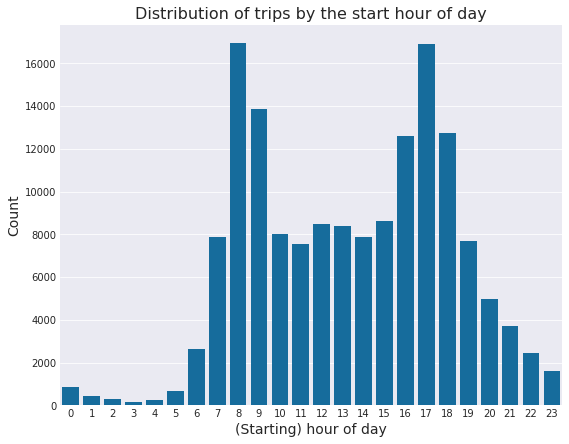

In [68]:
# Visualizing distribution of trips by hours

plt.rcParams['figure.figsize'] = 9, 7
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=main, x='start_hour_of_day', color=base_color)
plt.xlabel('(Starting) hour of day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of trips by the start hour of day", fontsize=16);

- The most busy hour is 5 PM, second busy hour is 8AM. The busy hours are 7-9 AM in morning and 4PM-6PM in the evening. This time is common commuting time.
- There is clearly a high usage during the peak hours when people go to school or work or they commute from it to home.

#### Lets check the usage of the rides per month

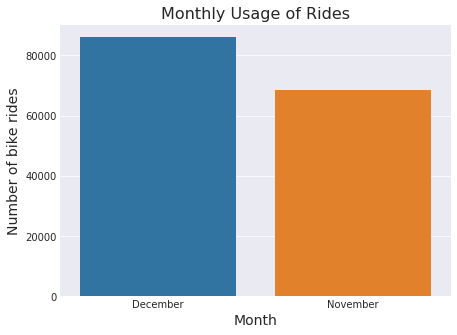

In [145]:
# Visualizing distribution of trips by hours

plt.rcParams['figure.figsize'] = 7, 5
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=main, x='start_month')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of bike rides', fontsize=14)
plt.title("Monthly Usage of Rides", fontsize=16);

- We can see from above that the distribution of rides in December month is more then November month 

##### What is the proportion between different user types?

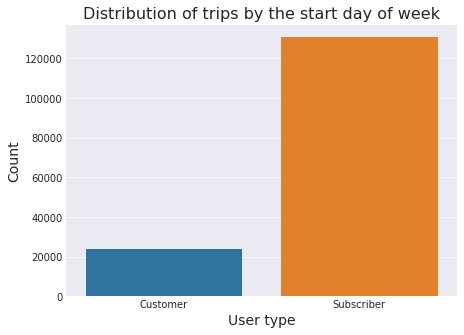

In [149]:
# Let's have a look at the number of users by user type
sb.countplot(data=main, x='user_type')
plt.xlabel('User type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of trips by the start day of week", fontsize=16);

- Majority of users are Subscribers.
- It makes sense since we saw that many rides could be from people commuting to work or school and these users will probably save money if they subscribe. In general makes sense that people that use the service frequently will prefer subscribing.

##### What is the distribution of the number of trips by a day in a week?

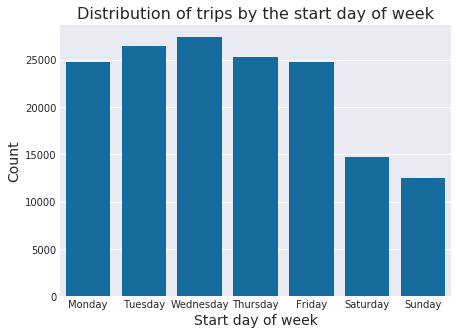

In [71]:
# Visualizing distribution of trips by days

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
main['start_day_of_week'] = main['start_day_of_week'].astype(weekdaycat)

sb.countplot(data=main, x='start_day_of_week', color=base_color)
plt.xlabel('Start day of week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of trips by the start day of week", fontsize=16);

- People use the bike less on Saturday and Sunday.


- It can clearly be seen that there is a big difference between the rides during the workweek and the rides during the weekend. This makes sense since during the weekends less people have to go to work or study as they do during the workweek.

- Something else to notice is that the frequency of rides during Monday and Friday is less than during Tuesday-Thursday. My guess is that this has to do with the fact that people try to take their vacation days in these days in order to connect those days with the weekend.


#### Lets check the bike rides distributed by duration (in sec)

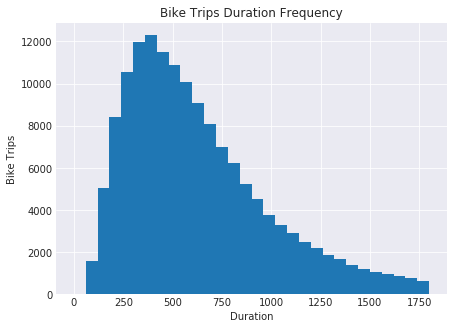

In [92]:
#Plot with the new maximum values. 
bins2 = np.arange(0, 1800+60,60)
main['duration_sec'].plot( kind = 'hist', bins = bins2)
plt.xlabel('Duration');
plt.ylabel('Bike Trips');
plt.title('Bike Trips Duration Frequency');

- Looking to distribution of plot, it's clearly skewed to right, and this shows the consumer behavior of duration seconds aren't too long, i can verify that calculating the median of the feature below:

In [73]:
#Duration_sec Median
main.duration_sec.median()

572.0

- Like i've said above, the median duration is less than 10 minutes

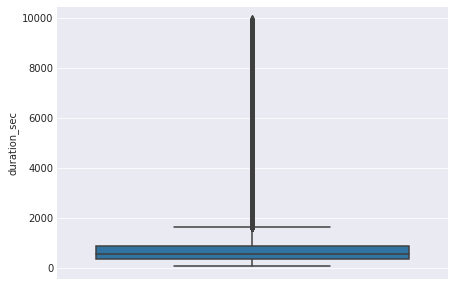

In [97]:
sb.boxplot(data=main, y='duration_sec');

###### That wasn't very clear, let's try a histogram

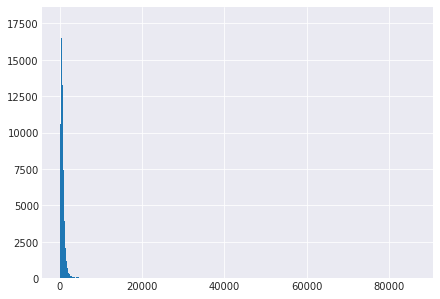

In [75]:
graph = main.duration_sec
plt.hist(graph,bins=1000);

##### Add range to the histogram

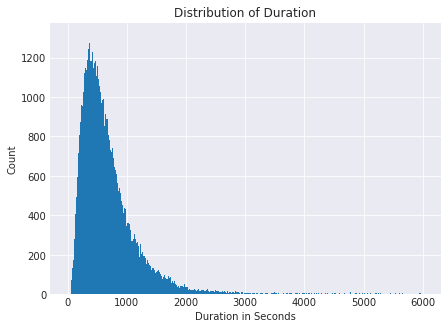

In [76]:
graph = main.duration_sec
plt.hist(graph,bins=1000,range=(0,6000));
plt.title("Distribution of Duration")
plt.xlabel('Duration in Seconds')
plt.ylabel('Count');

- Since most of the values seem to lie below 4000, let's remove the outliers, since average duration depends on trip duration being realistic. For this, I compute the Z score of each duration value and remove it if is below 3. That is, remove all values beyond two standard deviations.

In [77]:
main = main[(np.abs(stats.zscore(main.duration_sec)) < 3)]

In [78]:
main.describe()

duration_sec  start_station_id  start_station_latitude  \
count  154535.000000     154535.000000           154535.000000   
mean      753.323784        102.300003               37.766182   
std       781.985153         87.379515                0.098284   
min        61.000000          3.000000               37.317298   
25%       365.000000         28.000000               37.771058   
50%       568.000000         77.000000               37.781270   
75%       876.000000        154.000000               37.795392   
max      9940.000000        340.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            154535.000000   154535.000000         154534.000000   
mean               -122.357460       99.567192             37.766458   
std                   0.117445       86.776524              0.098193   
min                -122.444293        3.000000             37.317298   
25%                -122.412544       27.000000             37.771662   
50%                -122.399018       75.000000             37.781752   
75%                -122.390648      149.000000             37.795392   
max                -121.874119      340.000000             37.880222   

       end_station_longitude        bike_id   duration_min  start_hour_of_day  
count          154534.000000  154534.000000  154535.000000      154535.000000  
mean             -122.356573    1864.379813      12.555396          13.395755  
std                 0.116851    1019.863479      13.033086           4.631906  
min              -122.444293      10.000000       1.016667           0.000000  
25%              -122.411403    1014.000000       6.083333           9.000000  
50%              -122.398773    1967.000000       9.466667          14.000000  
75%              -122.390648    2762.000000      14.600000          17.000000  
max              -121.874119    3733.000000     165.666667          23.000000

- 99% records are retained and the max is much closer to 75% of the values, so let's visualize again

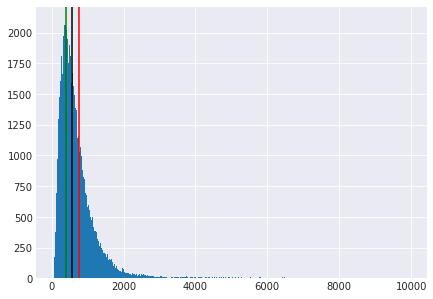

In [79]:
graph = main.duration_sec
plt.hist(graph,bins=1000);
plt.axvline(graph.mean(),color='red');
plt.axvline(statistics.mode(graph),color='green');
plt.axvline(statistics.median(graph),color='black');

##### Average Duration is :

In [80]:
main.duration_sec.mean()

753.32378425599381

###### Does the average duration depend on if a user is a subscriber or customer?

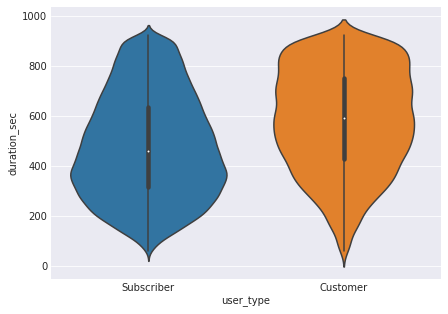

In [81]:
sb.violinplot(data=main[main.duration_sec<=923],x='user_type',y='duration_sec');

- Seems like duration is higher if the user type is a one time customer. However, this might also be dependent on the distance between locations, so an average should be taken over location to location and plotted

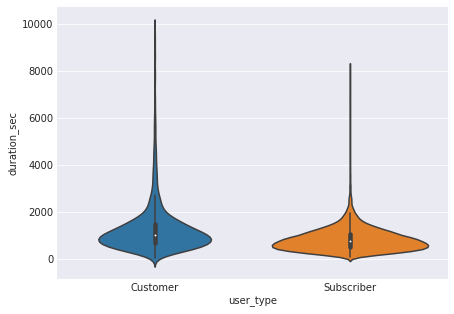

In [82]:
sb.violinplot(data=main.groupby(['start_station_id','end_station_id','user_type'])['duration_sec'].mean().reset_index(),
              x='user_type',y='duration_sec');

- Subscriber seems to have lesser duration, compared to Customer.

In [152]:
# Let's have a look at the outliers in duration_min
outliers = main.query('duration_min >= 77')
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1499 entries, 5 to 155674
Data columns (total 18 columns):
duration_sec               1499 non-null int64
start_time                 1499 non-null object
end_time                   1499 non-null object
start_station_id           1499 non-null int64
start_station_name         1499 non-null object
start_station_latitude     1499 non-null float64
start_station_longitude    1499 non-null float64
end_station_id             1499 non-null int64
end_station_name           1499 non-null object
end_station_latitude       1499 non-null float64
end_station_longitude      1499 non-null float64
bike_id                    1499 non-null float64
user_type                  1499 non-null object
duration_min               1499 non-null float64
start_date                 1499 non-null object
start_hour_of_day          1499 non-null int64
start_day_of_week          1499 non-null category
start_month                1499 non-null object
dtypes: category(1), fl

###### We have 1499 outliers in terms of duration (minutes) of a trip

In [99]:
outliers.sample(10)

duration_sec               start_time                 end_time  \
107286          9578  2017-11-23 14:55:50.794  2017-11-23 17:35:29.456   
61354           9276  2017-12-07 20:03:22.108  2017-12-07 22:37:59.018   
148930          5534  2017-11-09 18:55:51.485  2017-11-09 20:28:05.817   
9002            6176  2017-12-26 13:17:30.921  2017-12-26 15:00:27.660   
107626          7238  2017-11-23 12:11:13.612  2017-11-23 14:11:52.233   
117711          6450  2017-11-20 08:31:24.499  2017-11-20 10:18:55.239   
81668           9572  2017-12-02 10:31:37.963  2017-12-02 13:11:10.154   
56478           7192  2017-12-09 11:37:21.239  2017-12-09 13:37:13.975   
80942           8908  2017-12-02 14:20:46.941  2017-12-02 16:49:15.218   
36378           6807  2017-12-14 19:51:58.494  2017-12-14 21:45:25.753   

        start_station_id                                start_station_name  \
107286                11                            Davis St at Jackson St   
61354                 58                              Market St at 10th St   
148930                17  Embarcadero BART Station (Beale St at Market St)   
9002                   8                     The Embarcadero at Vallejo St   
107626               287                        Almaden Blvd at Balbach St   
117711                 3      Powell St BART Station (Market St at 4th St)   
81668                 19                              Post St at Kearny St   
56478                  6                     The Embarcadero at Sansome St   
80942                  6                     The Embarcadero at Sansome St   
36378                127                            Valencia St at 21st St   

        start_station_latitude  start_station_longitude  end_station_id  \
107286               37.797280              -122.398436              11   
61354                37.776619              -122.417385              44   
148930               37.792251              -122.397086               4   
9002                 37.799953              -122.398525              20   
107626               37.326730              -121.889273             304   
117711               37.786375              -122.404904             324   
81668                37.788975              -122.403452             324   
56478                37.804770              -122.403234              29   
80942                37.804770              -122.403234              48   
36378                37.756708              -122.421025             147   

                                         end_station_name  \
107286                             Davis St at Jackson St   
61354   Civic Center/UN Plaza BART Station (Market St ...   
148930                        Cyril Magnin St at Ellis St   
9002      Mechanics Monument Plaza (Market St at Bush St)   
107626                               Jackson St at 5th St   
117711                Union Square (Powell St at Post St)   
81668                 Union Square (Powell St at Post St)   
56478                       O'Farrell St at Divisadero St   
80942                                 2nd St at S Park St   
36378                              29th St at Tiffany Ave   

        end_station_latitude  end_station_longitude  bike_id user_type  \
107286             37.797280            -122.398436     15.0  Customer   
61354              37.781074            -122.411738   2090.0  Customer   
148930             37.785881            -122.408915   2150.0  Customer   
9002               37.791300            -122.399051   1090.0  Customer   
107626             37.348759            -121.894798   1685.0  Customer   
117711             37.788300            -122.408531   3157.0  Customer   
81668              37.788300            -122.408531   1919.0  Customer   
56478              37.782405            -122.439446    380.0  Customer   
80942              37.782411            -122.392706    418.0  Customer   
36378              37.744067            -122.421472   2984.0  Customer   

        duration_min 

When did the outlier cases happened?

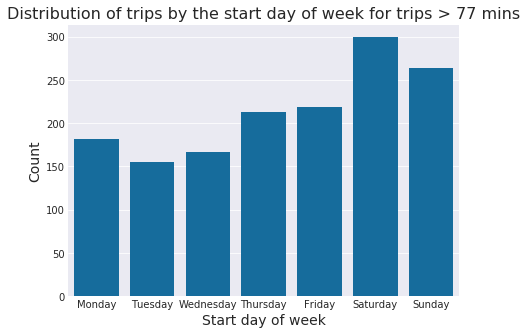

In [150]:
# Visualizing distribution of trips by a day of week for the dataset with outliers
sb.countplot(data=outliers, x='start_day_of_week',color=base_color)
plt.xlabel('Start day of week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of trips by the start day of week for trips > 77 mins", fontsize=16);

- It shows that people spend more time in bike during weekends.

##### At what time do we get the outlier cases?

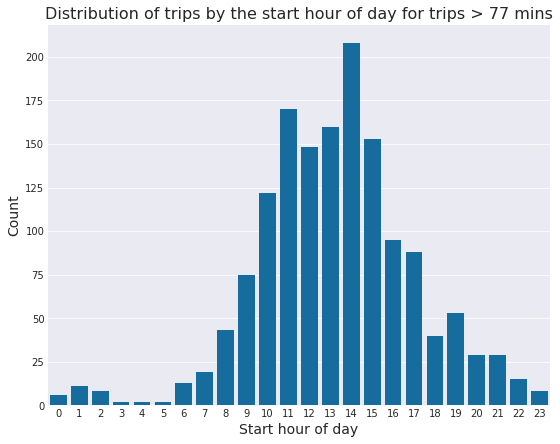

In [102]:
# Visualizing distribution of trips by hours for the dataset with outliers

plt.rcParams['figure.figsize'] = 9, 7
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=outliers, x='start_hour_of_day', color=base_color)
plt.xlabel('Start hour of day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of trips by the start hour of day for trips > 77 mins", fontsize=16);

- longer trips (>77 mins) will be more likely from 11 AM to 3 PM.

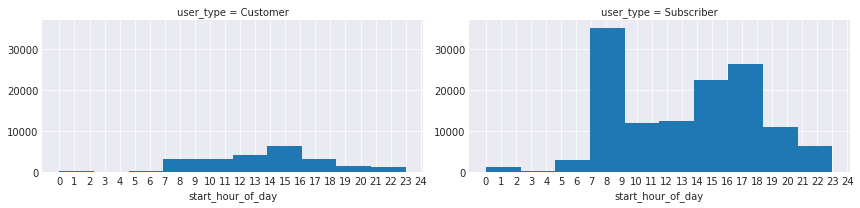

In [111]:
#By hour of the day (comparison between users type)
g = sb.FacetGrid(data=main, col='user_type',aspect=2)
g.map(plt.hist, 'start_hour_of_day');
plt.tight_layout()
plt.xticks(np.arange(0,25,1));

- Although customers tend to rent bikes seemingly uniformly, except for a peak in the afternoons, regular users(subscribers), seem to rent it in the mornings and evenings, which suggest that they take it for work.

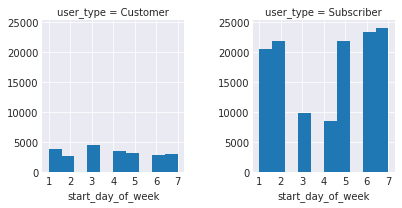

In [135]:
#By day of the week (comparison between users type)
g = sb.FacetGrid(data=main, col='user_type')
g.map(plt.hist,'start_day_of_week');
plt.tight_layout()
days = [ '1', '2', '3', '4', '5', 
             '6', '7']
g.set_xticklabels(days)

- Subscribers tend to drive more during the weekdays reinforcing the theory of bikes being considered a mode of transport for work.

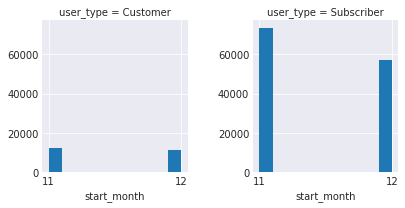

In [136]:
#By month of the year (comparison between users type)
g = sb.FacetGrid(data=main, col='user_type')
g.map(plt.hist,'start_month');
plt.tight_layout()
month=[11,12]
g.set_xticklabels(month)

- Irrespective of user type, demand seems to be equally in both months.

### Insights from univariate data exploration

  - The most busy hour is 5 PM, second busy hour is 8AM. The busy hours are 7-9 AM in morning and 4PM-6PM in the evening. This time is common commuting time.
  - On Saturdays and Sundays people tend to use the bike service less
  - Majority of the useres were subscribers.
  - Overall, people tend to rent a bike for less than an hour
  - Longer periods of use (> 77 mins) are associated with weekends
  - Longer trips (>77 mins) will be more likely from 12 PM to 4 PM.
  - Duration is higher if the user type is a one time customer
  - Subscriber seems to have lesser duration, compared to Customer.
  - Although customers tend to rent bikes seemingly uniformly, except for a peak in the afternoons, regular users(subscribers), seem to rent it in the mornings and evenings, which suggest that they take it for work.
  - Subscribers tend to drive more during the weekdays reinforcing the theory of bikes being considered a mode of transport for work.
  - Irrespective of user type, demand seems to be equally in both months.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

   - Duration in seconds had a lot of outliers which were trimmed using Z score as the determinant.
   - Duration in minutes also had outliers which is analysis for trips > 77 mins.

### the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

   - One of the most interesting observations was the relationship between user type and start hour of the trip. While Subscribers rented it in the mornings and evenings, Customers rented it sporadically, peaking slightly in the afternoon, suggesting that Subscribers used the bikes as a mode of transport for work

## Bivariate Exploration
   How much time do each user group tend to spend in a trip? Is there any difference?

#### Here are some of the combinations we shall be exploring :
   - Start_day_of_week and User Type
   - Hourly and User Type
   - User Type and Duration_sec
   - Monthly and User Type

#### Is there any difference in weekly usage between type of users?

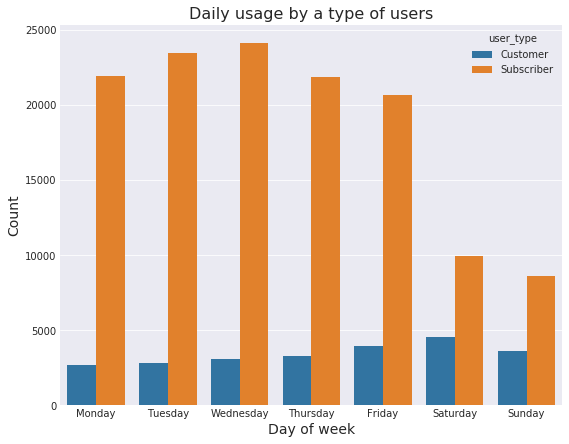

In [153]:
# Daily usage by a user type
plt.rcParams['figure.figsize'] = 9, 7
sb.countplot(data=main, x='start_day_of_week', hue='user_type');
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Daily usage by a type of users", fontsize=16);

- Customers more tend to use the service during weekends, while subscribers prefer to cycle from Monday to Friday

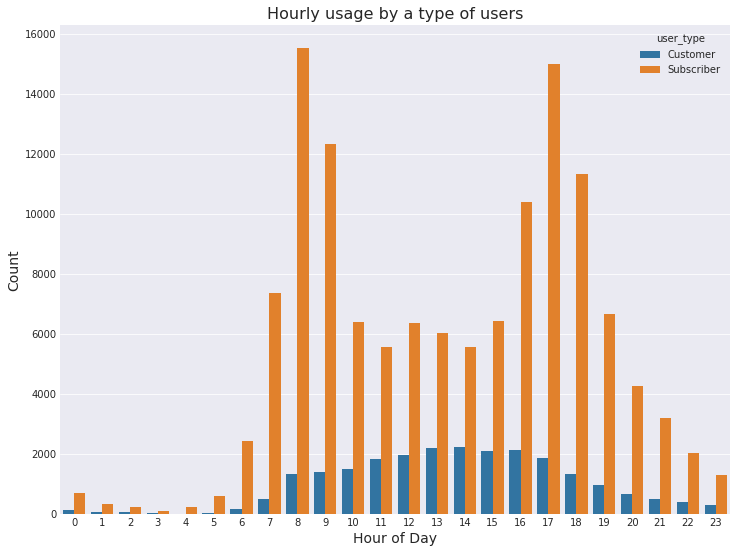

In [154]:
# Hourly usage by a user type
plt.rcParams['figure.figsize'] = 12, 9
sb.countplot(data=main, x='start_hour_of_day', hue='user_type');
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Hourly usage by a type of users", fontsize=16);

- Both customers and subscribers have similar pattern. This graph proves that customers and subscribers tend to use bike at rush a hours.

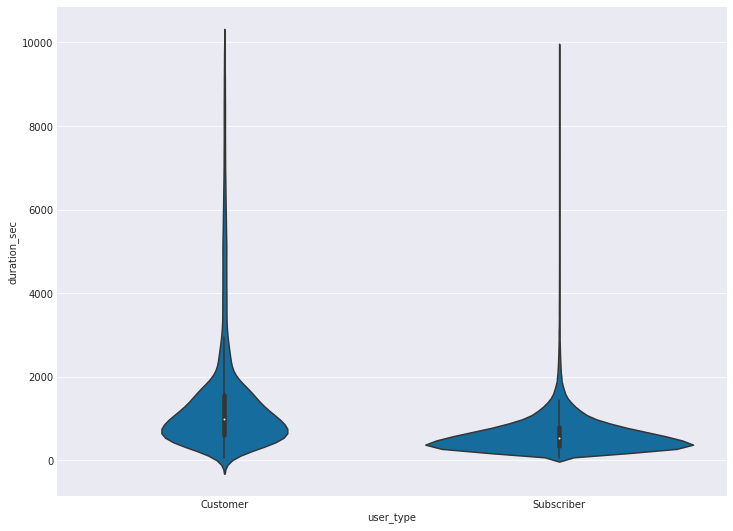

In [156]:
# User Type and Duration
sb.violinplot(data=main,x='user_type',y='duration_sec', color=base_color);

- subscribers seem to finish their trips faster than customers

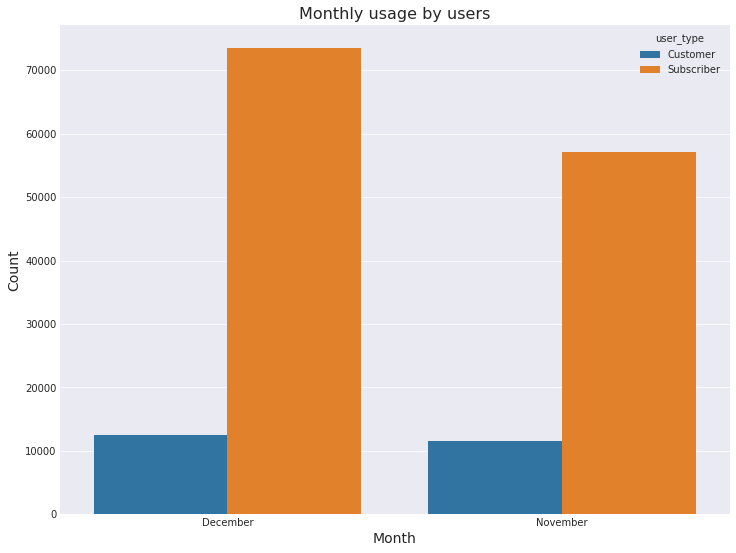

In [163]:
# User Type and Month
plt.rcParams['figure.figsize'] = 12, 9
sb.countplot(data=main, x='start_month', hue='user_type');
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Monthly usage by users", fontsize=16);

- Both customers and subscribers have similar pattern. This graph proves that customers and subscribers tend to use more bike in december month.

## Insights from bivariate data exploration
 - Customers more tend to use the service during weekends, while subscribers prefer to cycle from Monday to Friday
 - Both customers and subscribers have similar pattern. This graph proves that customers and subscribers tend to use bike at rush a hours.
 - Both customers and subscribers have similar pattern. This graph proves that customers and subscribers tend to use more bike in december month.

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
  - It is already established that subscribers seem to finish their trips faster than customers, the 1st plot further reinforces that point.

## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
 - There seems to be an interesting relationship between the time taken to complete a trip and the starting hour. Probably an indication of traffic.

## Multivariate Exploration
   Create plots of three or more variables to investigate your data even further. Make sure that your investigations are justified, and follow from your work in the previous sections.

#### Here are some of the combinations we shall be exploring :
 - User Type, start_day_of_week and Duration in Seconds
 - User Type, start_hour_of_day and Duration in Seconds

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


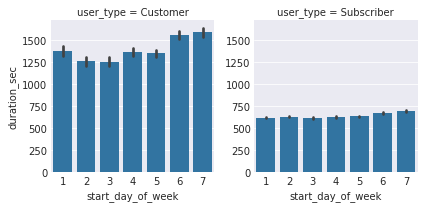

In [178]:
g = sb.FacetGrid(data=main, col='user_type')
days = [ '1', '2', '3', '4', '5', 
             '6', '7']
g.map(sb.barplot,'start_day_of_week','duration_sec');
g.set_xticklabels(days)
plt.tight_layout();

- Trip duration for customers is larger than for subscribers. Also, it is clear that subscribers spend less time in a trip than customers. Both of the user types have an increasing trend for the average time for a trip by the end of a week.

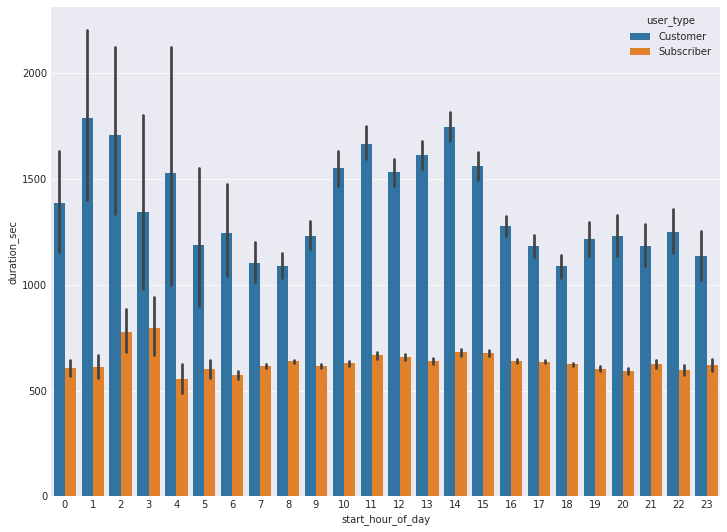

In [180]:
sb.barplot(data=main, x='start_hour_of_day',y='duration_sec',hue='user_type');

### Q2: How does the hourly usage vary during a week for customers and subscribers?

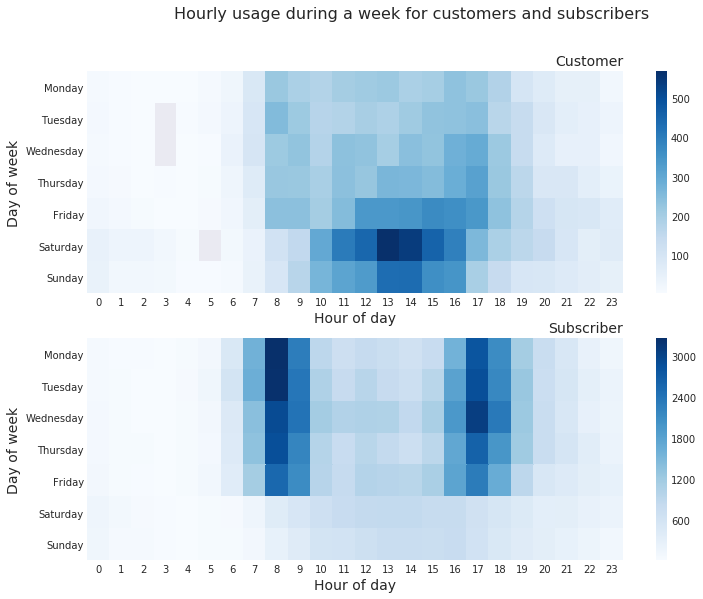

In [184]:
plt.suptitle('Hourly usage during a week for customers and subscribers', fontsize=16)

plt.subplot(2, 1, 1)
customers = main.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(ct_counts, cmap="Blues");
plt.title('Customer', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplot(2, 1, 2)
subscribers = main.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(st_counts, cmap="Blues");
plt.title('Subscriber', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

- It is interesting, that customers tend to use the bike service mostly on Sunday from 12 PM to 4 PM, while subscribers will likely have a trip from Monday to Friday during rush hours (7-9 AM, 4 PM - 6 PM).

## Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Sure. Definitely each of these graphs reinforces the general hypothesis that customers are more like recreational users and suscribers tend to be people that use them to go to work or school. But the last (multivariate explorations) help us get even more detail about the patterns of use and the differences between customers and suscribers.

## Were there any interesting or surprising interactions between features?

- Sure. For both types of users the distribution of rides during the weekdays depends a lot on the hour of the day and the month of the year.As expected, trip data seems to be most during the 9 am to 6 pm timeline, across stations with high traffic.